In [19]:
import matplotlib, sys,  os
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
sys.path.append("./mylib/")

import numpy as np
matplotlib.use('Agg')
import matplotlib.pyplot as plt

np.seterr(all="ignore")
from threeML import *
from WCDA_hal import HAL, HealpixConeROI, HealpixMapROI
import traceback
silence_warnings()
import warnings
warnings.simplefilter("ignore")
silence_warnings()
from threeML import silence_progress_bars, activate_progress_bars, toggle_progress_bars
from threeML.utils.progress_bar import trange

from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
# from astropy.visualization import astropy_mpl_style, imshAow_norm
from astropy.coordinates import Angle

import healpy as hp

from tqdm import tqdm

# from mylib import *
import mylib as my
from importlib import reload

In [ ]:
# you can do some change about the lib and reload it any time.
reload(my)

00:13:40 INFO      Region of Interest:                                                                   ]8;id=391687;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=739629;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#271\271]8;;\

         INFO      -------------------                                                                   ]8;id=674694;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=379570;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#272\272]8;;\

         INFO      HealpixConeROI: Center (R.A., Dec) = (83.630, 22.020), data radius =      ]8;id=394713;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_cone_roi.py\healpix_cone_roi.py]8;;\:]8;id=484075;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_cone_roi.py#87\87]8;;\
                  4.000 deg, model radius: 6.000 deg                                                               

         INFO                                                                                            ]8;id=250298;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=98872;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#275\275]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=720294;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=747812;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#276\276]8;;\

         INFO      --------------------                                                                  ]8;id=806464;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=135129;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#277\277]8;;\

         INFO      Width x height: 72 x 72 px                                                            ]8;id=822094;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=666187;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#279\279]8;;\

         INFO      Pixel sizes: 0.17 deg                                                                 ]8;id=620784;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=999462;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#281\281]8;;\

         INFO                                                                                            ]8;id=891043;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=425265;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#283\283]8;;\

         INFO      Response:                                                                             ]8;id=922517;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=804378;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#284\284]8;;\

         INFO      ---------                                                                             ]8;id=964218;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=940938;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#285\285]8;;\

         INFO      Response file:                                                                   ]8;id=664027;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=686042;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /data/home/cwy/Science/3MLWCDA0.91/Standard/src/../../data/WCDA_DR_psf.root                      

         INFO      Number of dec bins: 110                                                          ]8;id=423203;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=273044;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 6                                 ]8;id=274397;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=845088;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=164515;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=911661;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#289\289]8;;\

         INFO      Map Tree:                                                                             ]8;id=154970;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=311;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#290\290]8;;\

         INFO      ----------                                                                            ]8;id=192888;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=342579;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#291\291]8;;\

,Bin,Nside,Scheme,Obs counts,Bkg counts,obs/bkg,Pixels in ROI,Area (deg^2)
0,0,1024,RING,9049176.0,8.957547e+06,1.010229,15307,50.183859
1,1,1024,RING,4498398.0,4.406234e+06,1.020917,15307,50.183859
2,2,1024,RING,767271.0,7.373373e+05,1.040597,15307,50.183859
3,3,1024,RING,330508.0,3.103935e+05,1.064803,15307,50.183859
4,4,1024,RING,90150.0,8.267224e+04,1.090451,15307,50.183859
5,5,1024,RING,23476.0,2.077495e+04,1.130015,15307,50.183859


         INFO      This Map Tree contains 784.448 transits in the first bin                         ]8;id=656320;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=817695;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 1.47 Mb                                                         ]8;id=902617;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=899054;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=174986;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=586691;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#295\295]8;;\

         INFO      Active energy/nHit planes (6):                                                        ]8;id=78130;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=860443;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      -------------------------------                                                       ]8;id=728509;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=178688;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      ['0', '1', '2', '3', '4', '5']                                                        ]8;id=457354;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=935461;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#298\298]8;;\

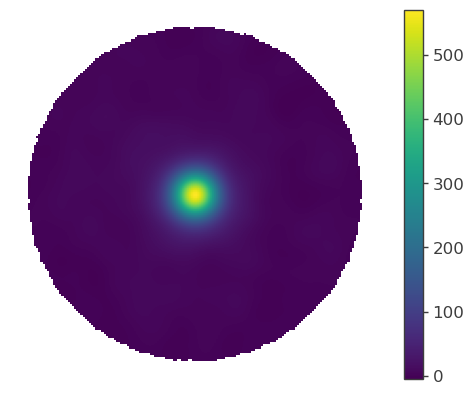

In [20]:
#####   Data Initialize

# maptree = "../../data/gcd_new.root"


maptree = "../../data/20210305_20230731_ihep_goodlist.root"
response = "../../data/WCDA_DR_psf.root"
# response = "../../data/DR_ihep_MK2.root"
# response = "../../data/DR_ihep_MK2_newpsf.root"

region_name="Crab"
if not os.path.exists(f'../res/{region_name}/'):
    os.system(f'mkdir ../res/{region_name}/')
ra_crab, dec_crab = 83.63,22.02
ra1,dec1=ra_crab, dec_crab

data_radius = 4.0
model_radius = 6.0
roi=HealpixConeROI(ra=ra1,dec=dec1,data_radius=data_radius,model_radius=model_radius)  
WCDA = HAL("WCDA", maptree, response, roi, flat_sky_pixels_size=0.17)

#####   Data Situation
%matplotlib inline
WCDA.set_active_measurements(0, 5)
WCDA.display()

fig = WCDA.display_stacked_image(smoothing_kernel_sigma=0.25)
fig.show()
fig.savefig(f"../res/{region_name}/counts_all.png",dpi=300)

In [21]:
Modelname="1pt+1gaus+GDE"  # Name your model now to facilitate the creation of record folders by the program.
if not os.path.exists(f'../res/{region_name}/{Modelname}/'):
    os.system(f'mkdir ../res/{region_name}/{Modelname}/')


#Without extended parameter settings, it's a point source. When you set the corresponding extension, it becomes the respective source.
# crab = my.setsorce("crab",ra1,dec1, fitrange=1,
#                 indexb=(-10,-1), kb=(1e-14, 1e-8),
#                 )

crab = my.setsorce("crab",ra1,dec1, fitrange=1, alpha=-2.6,beta=0.1,
                spec=Log_parabola()
                )
# crab2 = my.setsorce("crab2",ra1,dec1, fitrange=0.5, indexb=(-10,-1), kb=(1e-14, 1e-8)
#                 )

ext1 = my.setsorce("ext1",85.5,23.5, fitrange=1.5, sigma=1, sb=(0,3),
                indexb=(-10,1), kb=(1e-15, 1e-8)
                )

# Diffuse = my.set_diffusebkg(
#                 K = 3.3e-13, index = -2.3,
#                 Kf=False, indexf=False
#                 )

lm = Model(crab, ext1) #crab2,

with open(f'../res/{region_name}/{Modelname}/Model_init.txt', 'w') as f:
    for key, value in lm.parameters.items():
        f.write(f'{key}: {value}\n')

lm.display(complete=True)

Model summary:
==============

                  N
Point sources     1
Extended sources  1
Particle sources  0

Free parameters (10):
--------------------

                                       value min_value max_value   
crab.position.ra                       83.63     82.63     84.63  \
crab.position.dec                      22.02     21.02     23.02   
crab.spectrum.main.Log_parabola.K        0.0       0.0  100000.0   
crab.spectrum.main.Log_parabola.alpha   -2.6      None      None   
crab.spectrum.main.Log_parabola.beta     0.1      None      None   
ext1.Gaussian_on_sphere.lon0            85.5      84.0      87.0   
ext1.Gaussian_on_sphere.lat0            23.5      22.0      25.0   
ext1.Gaussian_on_sphere.sigma            1.0       0.0       3.0   
ext1.spectrum.main.Powerlaw.K            0.0       0.0       0.0   
ext1.spectrum.main.Powerlaw.index       -2.6     -10.0       1.0   

                                                 unit  
crab.position.ra                                  deg  
crab.position.dec                                 deg  
crab.spectrum.main.Log_parabola.K      keV-1 s-1 cm-2  
crab.spectrum.main.Log_parabola.alpha                  
crab.spectrum.main.Log_parabola.beta                   
ext1.Gaussian_on_sphere.lon0                      deg  
ext1.Gaussian_on_sphere.lat0                      deg  
ext1.Gaussian_on_sphere.sigma                     deg  
ext1.spectrum.main.Powerlaw.K          keV-1 s-1 cm-2  
ext1.spectrum.main.Powerlaw.index                      

Fixed parameters (2):
---------------------

                                            value min_value max_value unit
crab.spectrum.main.Log_parabola.piv  3000000000.0      None      None  keV
ext1.spectrum.main.Powerlaw.piv      3000000000.0      None      None  keV

Properties (0):
--------------------

(none)


Linked parameters (0):
----------------------

(none)

Independent variables:
----------------------

(none)

Linked functions (0):
----------------------

(none)

00:13:47 INFO      Considering 14 dec bins for extended source ext1                 ]8;id=436096;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=11662;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 23.500                       ]8;id=258422;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=418298;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=779395;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=966142;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=229437;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=983927;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
crab.position.ra,(8.36287 +/- 0.00015) x 10,deg
crab.position.dec,(2.20028 +/- 0.00013) x 10,deg
crab.spectrum.main.Log_parabola.K,(2.278 +/- 0.017) x 10^-21,1 / (cm2 keV s)
crab.spectrum.main.Log_parabola.alpha,-2.661 +/- 0.006,
crab.spectrum.main.Log_parabola.beta,(9.7 +/- 0.6) x 10^-2,
ext1.Gaussian_on_sphere.lon0,(8.586 +/- 0.012) x 10,deg
ext1.Gaussian_on_sphere.lat0,(2.346 +/- 0.010) x 10,deg
ext1.Gaussian_on_sphere.sigma,(10.0 +/- 0.7) x 10^-1,deg
ext1.spectrum.main.Powerlaw.K,(1.13 -0.23 +0.29) x 10^-22,1 / (cm2 keV s)


Correlation matrix:

1.00,0.01,-0.00,0.01,-0.00,0.02,0.03,-0.02,-0.02,0.02
0.01,1.00,0.00,0.01,-0.01,0.02,0.01,-0.01,-0.02,0.01
-0.00,0.00,1.00,0.03,0.84,0.01,0.01,-0.02,-0.01,0.00
0.01,0.01,0.03,1.00,-0.11,0.01,0.00,-0.02,0.04,-0.05
-0.00,-0.01,0.84,-0.11,1.00,-0.01,-0.01,0.01,0.02,-0.01
0.02,0.02,0.01,0.01,-0.01,1.00,0.06,0.36,0.24,-0.11
0.03,0.01,0.01,0.00,-0.01,0.06,1.00,0.12,0.07,-0.02
-0.02,-0.01,-0.02,-0.02,0.01,0.36,0.12,1.00,0.26,0.06
-0.02,-0.02,-0.01,0.04,0.02,0.24,0.07,0.26,1.00,-0.90
0.02,0.01,0.00,-0.05,-0.01,-0.11,-0.02,0.06,-0.90,1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,25281.442429
total,25281.442429


Values of statistical measures:

,statistical measures
AIC,50582.887254
BIC,50677.163108


Smoothing planes:   0%|          | 0/6 [00:00<?, ?it/s]

,value,negative_error,positive_error,error,unit
crab.position.ra,8.362870e+01,-1.461830e-03,1.470210e-03,1.466020e-03,deg
crab.position.dec,2.200284e+01,-1.271490e-03,1.273033e-03,1.272261e-03,deg
crab.spectrum.main.Log_parabola.K,2.278085e-21,-1.618784e-23,1.710820e-23,1.664802e-23,1 / (cm2 keV s)
crab.spectrum.main.Log_parabola.alpha,-2.661237e+00,-5.717792e-03,6.062226e-03,5.890009e-03,
crab.spectrum.main.Log_parabola.beta,9.692260e-02,-5.845468e-03,6.284670e-03,6.065069e-03,
ext1.Gaussian_on_sphere.lon0,8.586304e+01,-1.230057e-01,1.202929e-01,1.216493e-01,deg
ext1.Gaussian_on_sphere.lat0,2.345815e+01,-9.448770e-02,9.846703e-02,9.647736e-02,deg
ext1.Gaussian_on_sphere.sigma,9.971107e-01,-7.245523e-02,6.957434e-02,7.101479e-02,deg
ext1.spectrum.main.Powerlaw.K,1.127820e-22,-2.308005e-23,2.776470e-23,2.542237e-23,1 / (cm2 keV s)
ext1.spectrum.main.Powerlaw.index,-1.812164e+00,-1.184604e-01,1.234067e-01,1.209336e-01,


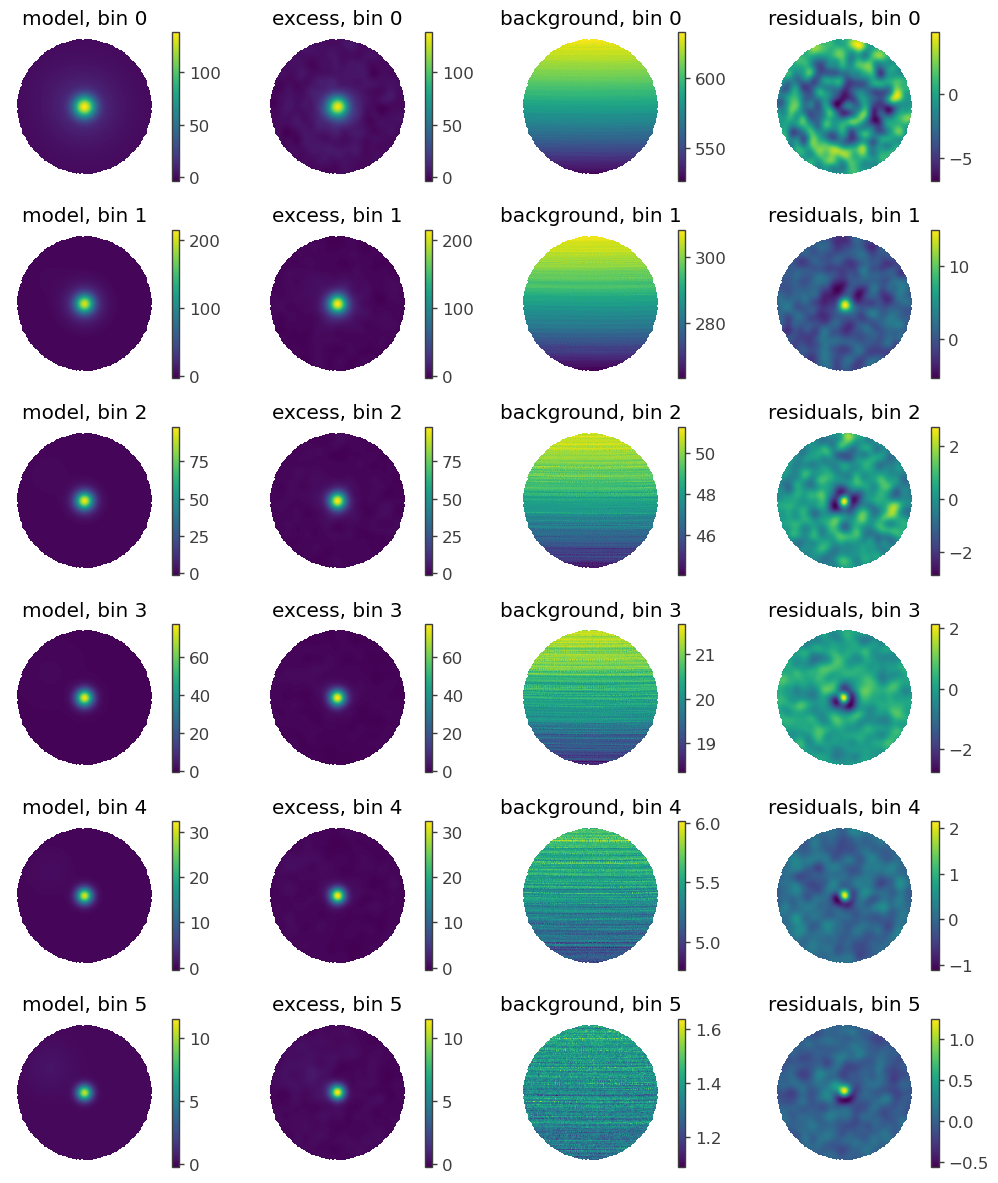

In [22]:
# Attempt the fitting; it will take approximately two minutes.
result = my.fit(region_name, Modelname, WCDA, lm, 0, 5, mini="minuit")
sources = my.get_sources(lm,result)
result[1][0]
# result[0].get_contours(J0248.Gaussian_on_sphere.lon0,39.88,44.88,30)

In [23]:
def _plot_spectrum(self, net_counts, yerr, model_only, residuals, residuals_err):

    fig, subs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [2, 1], 'hspace': 0})
    planes = np.array(self._active_planes, dtype=int)
    subs[0].errorbar(planes, net_counts, yerr=yerr,
                        capsize=0,
                        color='black', label='Net counts', fmt='.')

    subs[0].plot(planes, model_only, label='Convolved model')

    subs[0].legend(bbox_to_anchor=(1.0, 1.0), loc="upper right",
                    numpoints=1)

    # Residuals
    subs[1].axhline(0, linestyle='--')

    subs[1].errorbar(
        planes, residuals,
        yerr=residuals_err,
        capsize=0, fmt='.'
    )

    y_limits = [min(net_counts[net_counts > 0]) / 2., max(net_counts) * 2.]

    subs[0].set_yscale("log") #, nonposy='clip'
    subs[0].set_ylabel("Counts per bin")
    subs[0].set_xticks([])

    subs[1].set_xlabel("Analysis bin")
    subs[1].set_ylabel(r"$\frac{{cts - mod - bkg}}{\sqrt{mod + bkg}}$")
    subs[1].set_xticks(planes)
    subs[1].set_xticklabels(self._active_planes)

    subs[0].set_ylim(y_limits)

    return fig

def display_spectrum(WCDA):
    """
    Make a plot of the current spectrum and its residuals (integrated over space)

    :return: a matplotlib.Figure
    """

    from scipy.stats import poisson
    from past.utils import old_div
    n_point_sources = WCDA._likelihood_model.get_number_of_point_sources()
    n_ext_sources = WCDA._likelihood_model.get_number_of_extended_sources()

    total_counts = np.zeros(len(WCDA._active_planes), dtype=float)
    total_model = np.zeros_like(total_counts)
    model_only = np.zeros_like(total_counts)
    net_counts = np.zeros_like(total_counts)
    yerr_low = np.zeros_like(total_counts)
    yerr_high = np.zeros_like(total_counts)

    for i, energy_id in enumerate(WCDA._active_planes):

        data_analysis_bin = WCDA._maptree[energy_id]

        this_model_map_hpx = WCDA._get_expectation(data_analysis_bin, energy_id, n_point_sources, n_ext_sources)

        this_model_tot = np.sum(this_model_map_hpx)

        this_data_tot = np.sum(data_analysis_bin.observation_map.as_partial())
        this_bkg_tot = np.sum(data_analysis_bin.background_map.as_partial())

        total_counts[i] = this_data_tot
        net_counts[i] = this_data_tot - this_bkg_tot
        model_only[i] = this_model_tot

        this_wh_model = this_model_tot + this_bkg_tot
        total_model[i] = this_wh_model

        if this_data_tot >= 50.0:

            # Gaussian limit
            # Under the null hypothesis the data are distributed as a Gaussian with mu = model
            # and sigma = sqrt(model)
            # NOTE: since we neglect the background uncertainty, the background is part of the
            # model
            yerr_low[i] = np.sqrt(this_data_tot)
            yerr_high[i] = np.sqrt(this_data_tot)

        else:

            # Low-counts
            # Under the null hypothesis the data are distributed as a Poisson distribution with
            # mean = model, plot the 68% confidence interval (quantile=[0.16,1-0.16]).
            # NOTE: since we neglect the background uncertainty, the background is part of the
            # model
            quantile = 0.16
            mean = this_wh_model
            y_low = poisson.isf(1-quantile, mu=mean)
            y_high = poisson.isf(quantile, mu=mean)
            yerr_low[i] = mean-y_low
            yerr_high[i] = y_high-mean

    residuals = old_div((total_counts - total_model), np.sqrt(total_model))
    residuals_err = [old_div(yerr_high, np.sqrt(total_model)),
                        old_div(yerr_low, np.sqrt(total_model))]

    yerr = [yerr_high, yerr_low]

    return _plot_spectrum(WCDA, net_counts, yerr, model_only, residuals, residuals_err)



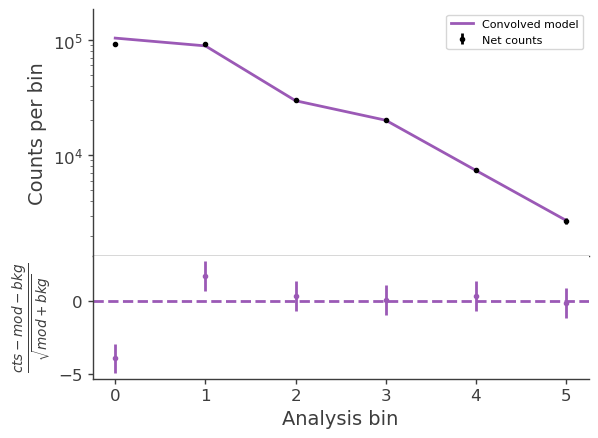

In [24]:
fig = display_spectrum(WCDA)

In [13]:
gof_obj = GoodnessOfFit(result[0])
gof, data_frame, like_data_frame = gof_obj.by_mc(n_iterations=200)

Goodness of fit computation:   0%|          | 0/200 [00:00<?, ?it/s]

InvalidPSFError: Trying to use an invalid PSF

In [25]:
# Compute Ts,  it will take approximately five minutes.
TSlist = ["crab", "ext1"] # A list put the sources that you want to compute TS
TS = {}
for sc in tqdm(TSlist):
    TS[sc]=result[0].compute_TS(sc,result[1][1]).values[0][2]
llh = WCDA.get_log_like()
TS_all = WCDA.cal_TS_all()
TS["TS_all"] = TS_all
TS["-log(likelihood)"] = -llh
TSresults = pd.DataFrame([TS])
TSresults.to_csv(f'../res/{region_name}/{Modelname}/Results.txt', sep='\t', mode='a', index=False)
TSresults

  0%|          | 0/2 [00:00<?, ?it/s]

00:21:47 INFO      Considering 14 dec bins for extended source ext1                 ]8;id=56926;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=629592;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 23.458                       ]8;id=788319;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=614071;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=494944;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=803622;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=863704;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=641965;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

00:21:59 INFO      Considering 14 dec bins for extended source ext1                 ]8;id=200019;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=744735;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 23.458                       ]8;id=353127;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=140799;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

 50%|█████     | 1/2 [00:13<00:13, 13.06s/it]

         INFO      set the minimizer to minuit                                             ]8;id=505860;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=659496;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=219035;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=233863;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

00:22:28 INFO      Considering 14 dec bins for extended source ext1                 ]8;id=654112;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=524816;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 23.458                       ]8;id=176927;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=223938;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

100%|██████████| 2/2 [00:42<00:00, 21.02s/it]


,crab,ext1,TS_all,-log(likelihood)
0,58054.103676,236.153339,125307.807463,25281.598839


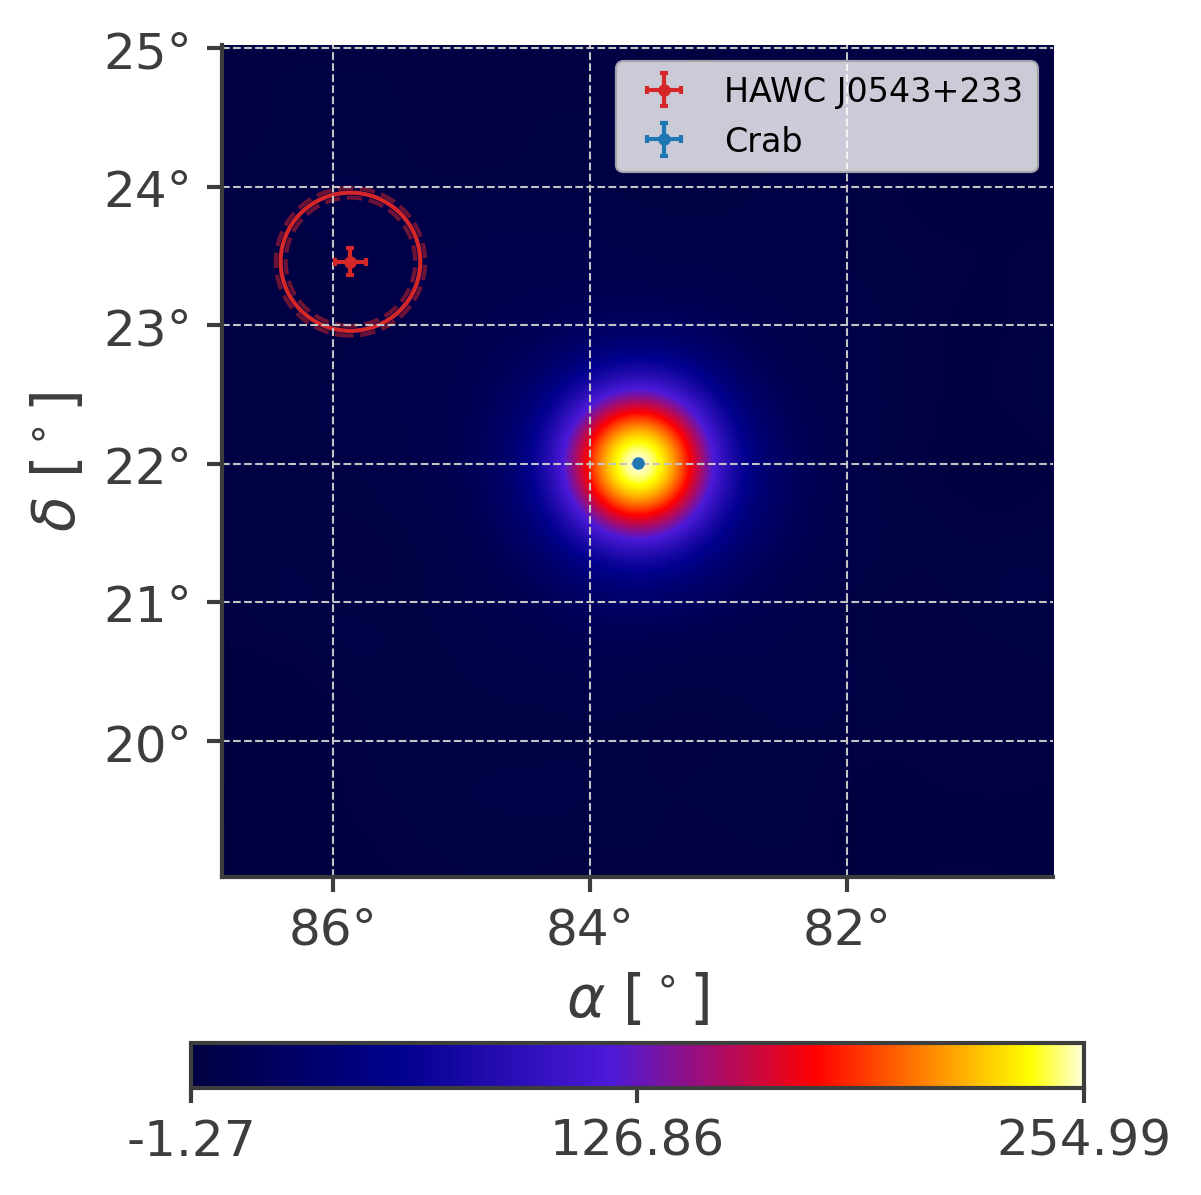

In [28]:
%matplotlib inline
sources = my.get_sources(lm,result)
sources["HAWC J0543+233"]=sources.pop("ext1")
sources["Crab"]=sources.pop("crab")
# sources={}
map2, skymapHeader = hp.read_map("../../data/signif_20210305_20230731_ihep_goodlist_nHit006_0.29.fits.gz.fits.gz",h=True)
map2 = hp.ma(map2)
fig = my.drawmap(region_name, Modelname, sources, map2, ra1, dec1, rad=6, contours=[1000],save=True, cat={})
plt.legend()

In [39]:
reload(my)

Yourlib init successful!!!


<module 'mylib' from '/data/home/cwy/Science/3MLWCDA0.91/Standard/src/mylib/__init__.py'>

In [29]:
Flux_WCDA, jls1 = my.getdatapoint(WCDA, lm, maptree, response, roi, "crab")
Flux_WCDA2, jls2 = my.getdatapoint(WCDA, lm, maptree, response, roi, "ext1", ifpowerlawM=1)
# Flux_WCDA3 = my.getdatapoint(WCDA, lm, maptree, response, roi, "crab2")

00:27:44 INFO      Considering 14 dec bins for extended source ext1                 ]8;id=381440;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=297558;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 23.458                       ]8;id=370055;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=245283;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=1249;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=587292;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=861438;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=266068;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabola.K,(2.160 -0.024 +0.025) x 10^-21,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,4487.405049
total,4487.405049


Values of statistical measures:

,statistical measures
AIC,8976.810142
BIC,8986.237923


00:27:45 INFO      Considering 14 dec bins for extended source ext1                 ]8;id=951267;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=895370;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

00:27:46 INFO      Central bin is bin at Declination = 23.458                       ]8;id=337346;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=684131;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=401390;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=812534;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=465293;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=872486;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      Considering 14 dec bins for extended source ext1                 ]8;id=130787;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=660954;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 23.458                       ]8;id=672643;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=778634;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

00:27:47 INFO      Considering 14 dec bins for extended source ext1                 ]8;id=233871;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=533299;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 23.458                       ]8;id=326494;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=327618;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=292857;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=684535;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=969876;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=731564;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabola.K,(2.353 -0.015 +0.016) x 10^-21,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,4572.093061
total,4572.093061


Values of statistical measures:

,statistical measures
AIC,9146.186166
BIC,9155.613947


         INFO      Considering 14 dec bins for extended source ext1                 ]8;id=287227;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=31703;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 23.458                       ]8;id=326056;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=942661;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=484222;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=814364;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=763266;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=922190;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      Considering 14 dec bins for extended source ext1                 ]8;id=125564;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=998325;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 23.458                       ]8;id=537529;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=228400;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

00:27:48 INFO      Considering 14 dec bins for extended source ext1                 ]8;id=399247;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=196562;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 23.458                       ]8;id=917782;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=40441;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=178290;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=355683;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=621641;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=6025;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabola.K,(2.241 +/- 0.019) x 10^-21,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,4267.933225
total,4267.933225


Values of statistical measures:

,statistical measures
AIC,8537.866494
BIC,8547.294275


00:27:49 INFO      Considering 14 dec bins for extended source ext1                 ]8;id=698494;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=304912;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 23.458                       ]8;id=795425;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=318392;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=801042;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=197997;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=419301;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=361506;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      Considering 14 dec bins for extended source ext1                 ]8;id=975839;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=336556;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 23.458                       ]8;id=282012;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=782169;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

00:27:50 INFO      Considering 14 dec bins for extended source ext1                 ]8;id=299742;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=817039;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 23.458                       ]8;id=641695;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=975909;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=244686;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=679695;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=280847;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=555162;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabola.K,(2.229 +/- 0.020) x 10^-21,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,4271.927385
total,4271.927385


Values of statistical measures:

,statistical measures
AIC,8545.854813
BIC,8555.282594


         INFO      Considering 14 dec bins for extended source ext1                 ]8;id=135315;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=373118;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 23.458                       ]8;id=356607;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=642823;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=323666;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=487148;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=612490;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=463228;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      Considering 14 dec bins for extended source ext1                 ]8;id=710430;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=304121;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 23.458                       ]8;id=312613;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=669870;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

00:27:51 INFO      Considering 14 dec bins for extended source ext1                 ]8;id=360574;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=259937;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 23.458                       ]8;id=99119;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=966582;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=80699;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=741151;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=327906;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=479938;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabola.K,(2.269 -0.032 +0.033) x 10^-21,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,4042.690741
total,4042.690741


Values of statistical measures:

,statistical measures
AIC,8087.381525
BIC,8096.809306


         INFO      Considering 14 dec bins for extended source ext1                 ]8;id=143429;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=852163;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 23.458                       ]8;id=572003;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=664019;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=982669;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=363168;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=276151;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=747480;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

00:27:52 INFO      Considering 14 dec bins for extended source ext1                 ]8;id=924856;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=165820;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 23.458                       ]8;id=511809;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=19548;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 14 dec bins for extended source ext1                 ]8;id=402908;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=944871;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 23.458                       ]8;id=533976;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=210964;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=197811;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=954573;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=165174;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=359651;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabola.K,(2.37 +/- 0.06) x 10^-21,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,3610.088187
total,3610.088187


Values of statistical measures:

,statistical measures
AIC,7222.176418
BIC,7231.604200


00:27:53 INFO      Considering 14 dec bins for extended source ext1                 ]8;id=169414;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=830193;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 23.458                       ]8;id=132190;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=101549;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=532656;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=971022;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=87090;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=308679;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      Considering 14 dec bins for extended source ext1                 ]8;id=847122;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=207189;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 23.458                       ]8;id=660069;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=997580;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

00:27:54 INFO      Considering 14 dec bins for extended source ext1                 ]8;id=773711;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=143585;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 23.458                       ]8;id=590348;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=968092;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=65736;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=946333;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=764138;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=41397;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
ext1.spectrum.main.PowerlawM.K,(-1.1 +/- 0.7) x 10^-22,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,4493.143053
total,4493.143053


Values of statistical measures:

,statistical measures
AIC,8988.286149
BIC,8997.713930


00:27:55 INFO      set the minimizer to minuit                                             ]8;id=884372;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=356695;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=940263;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=639636;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

00:27:56 INFO      Considering 14 dec bins for extended source ext1                 ]8;id=733002;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=880895;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 23.458                       ]8;id=794446;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=85853;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

00:27:57 INFO      Considering 14 dec bins for extended source ext1                 ]8;id=363701;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=824520;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 23.458                       ]8;id=446786;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=264818;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=190192;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=885805;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=359065;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=310891;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
ext1.spectrum.main.PowerlawM.K,(1.22 +/- 0.33) x 10^-22,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,4583.970118
total,4583.970118


Values of statistical measures:

,statistical measures
AIC,9169.940279
BIC,9179.368060


00:27:58 INFO      set the minimizer to minuit                                             ]8;id=957417;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=802268;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=560698;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=871700;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      Considering 14 dec bins for extended source ext1                 ]8;id=73942;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=740542;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 23.458                       ]8;id=952556;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=402689;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

00:27:59 INFO      Considering 14 dec bins for extended source ext1                 ]8;id=649973;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=412;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 23.458                       ]8;id=456335;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=877426;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=268071;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=444340;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=452329;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=198050;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
ext1.spectrum.main.PowerlawM.K,(1.26 +/- 0.27) x 10^-22,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,4269.761649
total,4269.761649


Values of statistical measures:

,statistical measures
AIC,8541.523342
BIC,8550.951124


00:28:00 INFO      set the minimizer to minuit                                             ]8;id=701540;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=153201;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=743465;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=12528;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      Considering 14 dec bins for extended source ext1                 ]8;id=67900;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=501228;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 23.458                       ]8;id=43247;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=340057;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

00:28:01 INFO      Considering 14 dec bins for extended source ext1                 ]8;id=763827;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=359584;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 23.458                       ]8;id=23486;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=853105;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=726404;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=874840;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=858866;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=912264;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
ext1.spectrum.main.PowerlawM.K,(1.33 +/- 0.18) x 10^-22,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,4274.215767
total,4274.215767


Values of statistical measures:

,statistical measures
AIC,8550.431578
BIC,8559.859360


         INFO      set the minimizer to minuit                                             ]8;id=819941;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=413863;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=983072;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=978787;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      Considering 14 dec bins for extended source ext1                 ]8;id=727105;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=509878;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 23.458                       ]8;id=87233;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=217446;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

00:28:02 INFO      Considering 14 dec bins for extended source ext1                 ]8;id=168910;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=699590;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 23.458                       ]8;id=498090;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=452480;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=873485;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=943089;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=651644;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=730617;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
ext1.spectrum.main.PowerlawM.K,(1.09 +/- 0.15) x 10^-22,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,4042.708589
total,4042.708589


Values of statistical measures:

,statistical measures
AIC,8087.417221
BIC,8096.845003


00:28:03 INFO      set the minimizer to minuit                                             ]8;id=326223;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=16358;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=845616;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=401180;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      Considering 14 dec bins for extended source ext1                 ]8;id=172659;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=474185;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 23.458                       ]8;id=146473;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=524800;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

00:28:04 INFO      Considering 14 dec bins for extended source ext1                 ]8;id=65387;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=390757;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 23.458                       ]8;id=546687;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=173027;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=304406;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=465619;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=626348;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=930649;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
ext1.spectrum.main.PowerlawM.K,(1.09 +/- 0.12) x 10^-22,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,3611.30877
total,3611.30877


Values of statistical measures:

,statistical measures
AIC,7224.617584
BIC,7234.045365


00:28:05 INFO      set the minimizer to minuit                                             ]8;id=821406;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=928765;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=70163;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=935121;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      Considering 14 dec bins for extended source ext1                 ]8;id=29278;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=678335;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 23.458                       ]8;id=603272;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=983962;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]

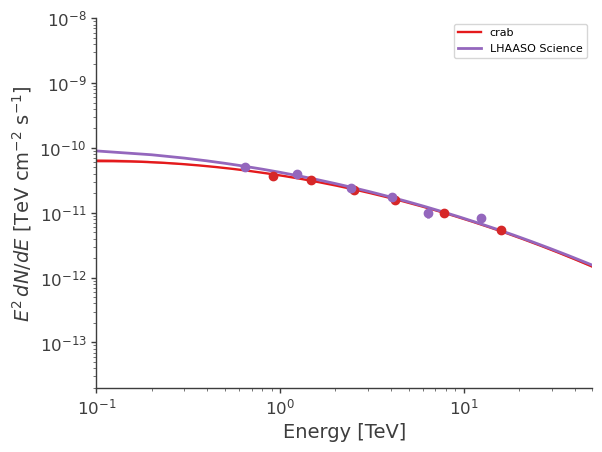

In [30]:
%matplotlib inline
x_Max=50.
x_Min=.1
y_Min=0.2e-13
y_Max=1e-8
fig,ax = plt.subplots()
plot_spectra(
    result[0].results,
    sources_to_use=["crab"],
    include_extended=True,
    ene_min=x_Min,
    ene_max=x_Max,
    num_ene=30,
    energy_unit="TeV",
    flux_unit="TeV/(s cm2)",
    subplot=ax
    )

my.Draw_sepctrum_points(region_name, Modelname, Flux_WCDA,"","tab:red")
# my.Draw_sepctrum_points(region_name, Modelname, Flux_WCDA3,"Crab_data2","tab:blue")
# my.Draw_sepctrum_points(region_name, Modelname, Flux_WCDA2,"","tab:blue")

e_J0248=np.linspace(x_Min,x_Max,500)
crab_data = np.array([[0.645589, 4.99911e-11, 5.2533e-12],
[1.23979, 3.89817e-11, 2.24529e-12],
[2.42276, 2.40127e-11, 1.76418e-12],
[4.06902, 1.73829e-11, 1.68635e-12],
[6.35322, 9.85614e-12, 1.47362e-12],
[12.3595, 8.32206e-12, 8.84423e-13]])
flux_J0248_sci=e_J0248**2*8.2e-14*pow(e_J0248/10,-2.9-0.19*np.log10(e_J0248/10))
plt.errorbar(crab_data[:,0], crab_data[:,1], crab_data[:,2],fmt="o", c = "tab:purple") #,label='Crab Science'
plt.plot(e_J0248,flux_J0248_sci,label='LHAASO Science', c = "tab:purple")

# LHAASO_sensitivity = np.genfromtxt("./LHAASO_sensitivity.csv",delimiter=',')
# plt.plot(LHAASO_sensitivity[:,0],LHAASO_sensitivity[:,1]*1e-11,label="LHAASO 1yr", c="black")

ax.set_xlim(x_Min,x_Max)
ax.set_ylim(y_Min,y_Max)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
ax.set_xlabel("Energy [TeV]")
plt.legend()
plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.png', dpi=300)
plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.pdf')

In [20]:
f1 = Flux_WCDA[0][3]*1e9*Flux_WCDA[0][0]**2
e1 = Flux_WCDA[0][0]
f2=Flux_WCDA[0][0]**2*8.2e-14*pow(Flux_WCDA[0][0]/10,-2.9-0.19*np.log10(Flux_WCDA[0][0]/10))
print(e1, f1, f2, (f2-f1)/f2)

1.092009304880129 3.343407958321984e-11 4.014750104308849e-11 0.16721891239665054


In [31]:
#About 5 min
smoothsigma=[0.4123, 0.3111, 0.2476, 0.2064, 0.1633, 0.1379, 0.2896, 0.2594, 0.2152, 0.189, 0.1561, 0.14]#The first six bins are normal, and the following ones are merged bins, representing the total (merged), without the first bin, and without the first two bins, respectively.
maps = my.getmap(WCDA,roi,"Crab",
                 modelindex=[1,1], # modelindex: pt and ext number
               # pta=[0], exta=[0],
                   stack=[1.010229, 1.020917, 1.040597, 1.064803, 1.090451, 1.130015], #Combine bins with all bin based on signal-to-noise ratio.
                  #  stack=[0, 0, 1.002131,1.005977,1.002093,1.004078], #Combine bins with nhit >= 200 based on signal-to-noise ratio.
                  #  stack=[0, 1.002131,1.005977,1.002093,1.004078],
                   smoothsigma=smoothsigma
                   #, binc=["1","2","3","4","5"]
                   )
smapall = my.smoothmap(maps[-1], smooth_sigma=0.2896)

100%|██████████| 15307/15307 [00:00<00:00, 133236.37it/s]


Mask all


100%|██████████| 15307/15307 [00:00<00:00, 87405.60it/s]


Mask all


100%|██████████| 15307/15307 [00:00<00:00, 86928.79it/s]


Mask all


100%|██████████| 15307/15307 [00:00<00:00, 75410.03it/s]


Mask all


100%|██████████| 15307/15307 [00:00<00:00, 87888.40it/s]


Mask all


100%|██████████| 15307/15307 [00:00<00:00, 81222.36it/s]


Mask all


100%|██████████| 15307/15307 [00:00<00:00, 497140.47it/s]


Smooth Sig
Smooth bkg
Smooth Modelbkg
Mask all


100%|██████████| 5/5 [00:01<00:00,  2.77it/s]


compute disk:   0%|          | 0/20 [00:00<?, ?it/s]

compute ring: 100%|██████████| 19/19 [00:00<00:00, 129791.17it/s]


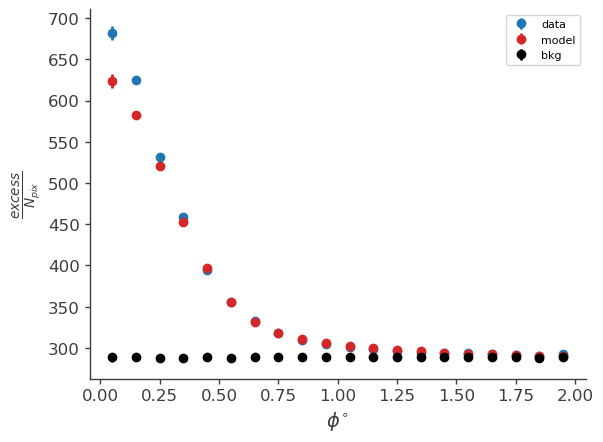

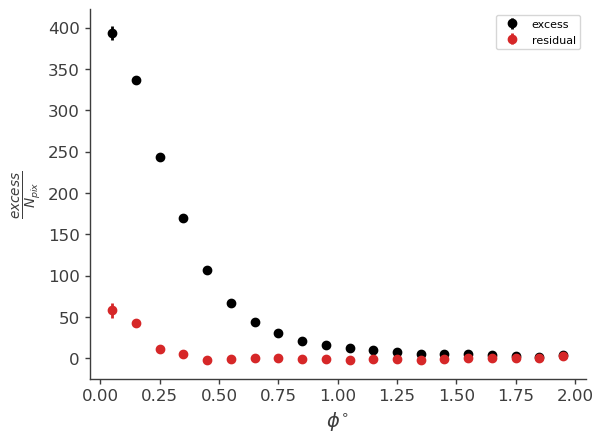

In [11]:
%matplotlib inline
psfdata = my.Draw_lateral_distribution(maps[0], 83.622, 22.002, 20, 0.1, True)

************************
[6.76155831e+02 3.26515363e-01 1.18150076e+00]
************************
max Significance= 8.2
TeVCat:  1 80.43749999999999 21.214277777777777 VER J0521+211
TeVCat:  2 83.62874999999998 22.01236111111111 Crab
TeVCat:  3 83.63291666666665 22.0145 Crab Pulsar
TeVCat:  4 85.77999999999999 23.4 HAWC J0543+233
PSR:  1 82.21774999999998 22.00111111111111 J0528+2200
PSR:  2 83.63320833333333 22.01447222222222 J0534+2200
PSR:  3 85.79025 23.484722222222224 J0543+2329
PSR:  4 86.61983333333332 24.689166666666665 J0546+2441
SNR:  1 83.62916666666665 22.016666666666666 G184.6-05.8
AGN:  1 80.4445 21.2131 J0521.7+2112
AGN:  2 81.5908 22.7778 J0526.3+2246
3FHL:  1 80.44172 21.213364 3FHL J0521.7+2112
3FHL:  2 83.634834 22.019203 3FHL J0534.5+2201


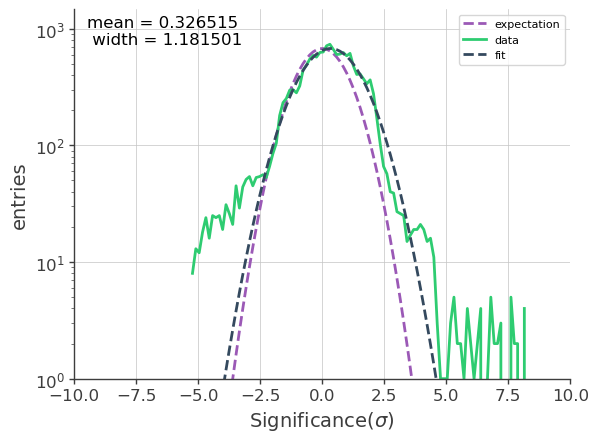

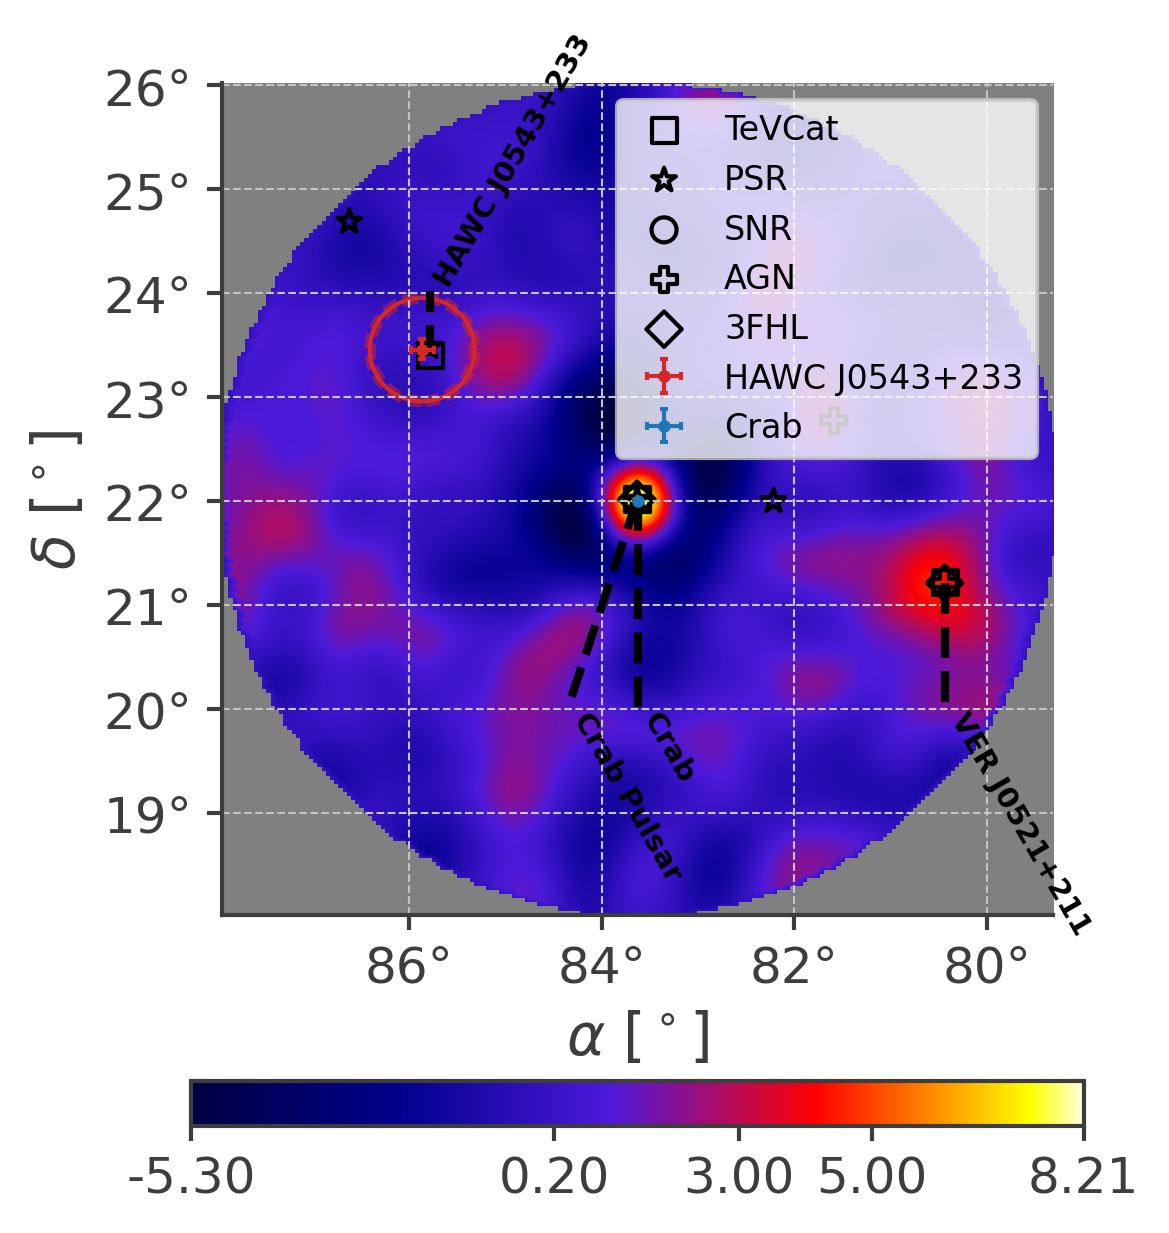

In [32]:
%matplotlib inline
res=True # Do you want resmap? or org map.
saven = "Significance"
if res:
    saven+="_res"
sigmap = my.getsigmap(region_name, Modelname, [smapall],i=0,signif=17,res=res,name="Crab")
fig = my.drawmap(region_name, Modelname, sources, sigmap, ra1, dec1, rad=2*data_radius, contours=[1000],save=True,savename=saven)
#There is another source around crab, so you can try another model: 1pt+1gaus maybe?

In [7]:
# If you want to get residual llh map, you need a new rootfile.
my.write_resmap(region_name, Modelname, WCDA, roi, maptree, 
ra1, dec1, "crab_res",
[0],[0], #point source and ext source, if you have 3pt and 2 ext, and you only want sig about pt1, then use [1,0,0],[0, 0], or you only want 2nd ext: [0,0,0],[0,1]
binc="all"
)
# ! The file you got need use Add_UserInfo.cc in ./tools/llh_skymap to add UserInfo

processing at nHit0 0


100%|██████████| 95570/95570 [00:03<00:00, 30685.46it/s]


processing at nHit0 1


100%|██████████| 95570/95570 [00:01<00:00, 49498.00it/s]


processing at nHit0 2


100%|██████████| 95570/95570 [00:02<00:00, 45865.39it/s]


processing at nHit0 3


100%|██████████| 95570/95570 [00:02<00:00, 45459.47it/s]


processing at nHit0 4


100%|██████████| 95570/95570 [00:02<00:00, 45094.84it/s]


processing at nHit0 5


100%|██████████| 95570/95570 [00:01<00:00, 53625.56it/s]
